# CHAPTER3 성능평가지표와 PR곡선

## 3.1 성능평가지표

### 3.1.1 혼동 행렬의 이해
- 혼동 행렬(Confusion Matrix) : 각 테스트 데이터에 대한 모델의 예측 결과를 TP, TN, FP, FN 4가지의 관점에서 분류하고 각각에 해당하는 예측 결과의 개수를 정리한 표

![ㅇ](https://thebook.io/img/080223/269.jpg)



```
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true, y_pred)
```



### 3.1.2 혼동 행렬 구현하기

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
y_true = [0,0,0,1,1,1]
y_pred = [1,0,0,1,1,1]

confmat = confusion_matrix(y_true, y_pred)

confmat

array([[2, 1],
       [0, 3]])

### 3.1.3 정확도

- 분류의 경우 모델의 성능을 평가하기 위한 기준이 필요하다
- 혼동 행렬의 각 개수를 바탕으로 산출 가능한 성능평가지표를 설명하겠다

  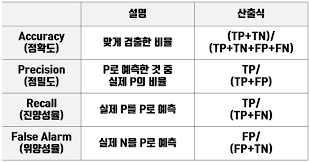



### 3.1.4 F값

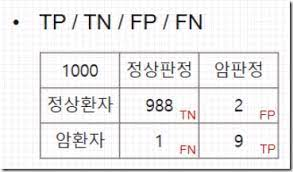

- 여기서 정확도를 구하면 997/1000, 99.7%라는 굉장히 높은 정확도가 나온다
- 하지만 이렇게 데이터가 한쪽으로 치우쳤을 경우 정확도를 지표로 사용하면 정확한 평가를 할 수 없다
- 따라서 정밀도, 재현율, F-score를 지표로 사용한다

- 정밀도는 양성으로 예측된 데이터 중 실제로 양성인 것의 비율 => 양성으로 예측해서 맞춘 비율 

 => 맞든 틀리든 양성으로 다 예측한거 중에 맞춘 비율

- 재현율은 실제 양성 데이터 중 양성으로 예측된 것의 비율 => 실제 양성 중에서 맞춘 비율 

![ㅇ](https://nrms.kisti.re.kr/bitextimages/TRKO202100009231/TRKO202100009231_94_image_52.png)

In [6]:
confmat

array([[2, 1],
       [0, 3]])

In [5]:
# confmat 정밀도
2/2

# confmat 재현율
2/3

# confmat f1-score
2 * 2/2*2/3 / (2/2+2/3)

0.8

### 3.1.5 성능평가지표 구현하기

In [9]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

y_true = [0,0,0,1,1,1]
y_pred = [1,0,0,1,1,1]

print('Precision: %.3d' % precision_score(y_true, y_pred))
print('Recall: %.3f' % recall_score(y_true, y_pred))
print('F1: %.3f' % f1_score(y_true, y_pred))

Precision: 000
Recall: 1.000
F1: 0.857


In [13]:
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1score = 2 * (precision * recall) / (precision + recall)
f1score
print('F1: %.3f' % f1score)

F1: 0.857


## 3.2 PR곡선

### 3.2.1 재현율과 정밀도의 관계

- 재현율과 정밀도는 트레이드오프, 상충관계이다
- 하나가 오르면 하나가 낮아진다
- 암검진처럼 실제 암이 존재하는지를 찾아야 하는 경우는 암발견을 놓칠경우 치명적인 영향을 미칠수 있기에 재현율을 중시한다. 
- 웹사이트의 추천 기능이나 스팸메일의 경우 정밀도를 중시한다. 스팸메일을 놓쳐서 일반 메일로 오는건 상관없지만 일반 메일이 스팸메일로 넘어가버리면 업무상 차질을 유발할 수 있다

### 3.2.2 PR곡선이란

- 가로축이 재현율, 세로축을 정밀도로 그린 그래프


### 3.2.3 PR곡선을 이용한 모델 평가

ex) 암 건진 비즈니스시 모든 고객 중 우선적으로 접근할 우량 고객을 판정하는 문제

=> 우량 고객으로 예상한 고객과 실제 우량 고객

- 정밀도가 높고 / 재현율이 낮은 상태, 기회손실이 발생

 => 낭비는 적지만 손실이 많은 판정을 하고 있는 상태

- 정밀도가 낮고 / 재현율이 높은 상태, 접근에 예산이 낭비될 가능성 높음

 => 손실은 적지만 낭비가 많은 판정을 하고 있는 상태

==> PR곡선에서 정밀도와 재현율이 일치하는 곳을 **손익분기점(Break-Evan Point=BEP)**이라고 한다

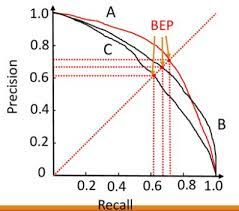


In [15]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

# 1. 지도 데이터 준비
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

# 2. 지도 데이터를 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# 3. 머신러닝 알고리즘을 훈련 데이터로 학습
svc = svm.SVC(C=1, kernel='rbf', gamma = 0.001)
svc.fit(X_train, y_train)

# 4. 테스트 데이터를 이용해 얼마나 예측이 적중했는지 확인하고, 머신러닝 알고리즘의 성능을 확인.
y_pred = svc.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.63
